# Convert ESRI shapefile to csv
---

In [1]:
import geopandas
import pandas as pd
import matplotlib as mtpl

import matplotlib.pyplot as plt

<AxesSubplot:>

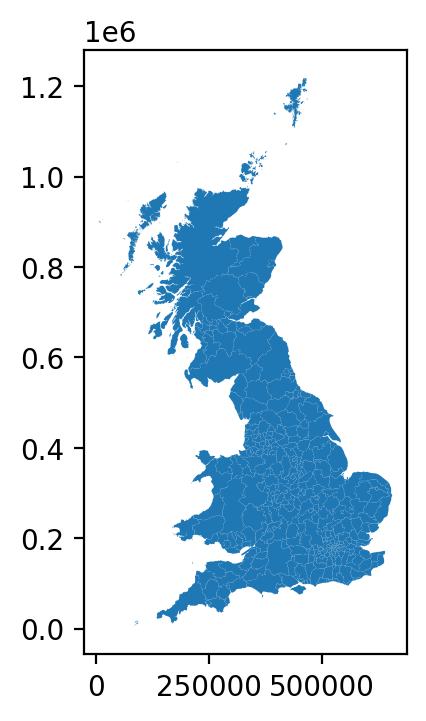

In [2]:
mtpl.rcParams['figure.dpi'] = 200
map = geopandas.read_file('data/maps/district_borough_unitary_region.shp')
map.plot()

In [3]:
map

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry
0,Cheshire East (B),UTA,Unitary Authority,CHESHIRE_EAST_(B),1,1,123504,43553,E06000049,116635.738,0.000,AA,CIVIL ADMINISTRATION AREA,None,None,"POLYGON ((398030.799 385931.898, 398029.703 38..."
1,Central Bedfordshire,UTA,Unitary Authority,CENTRAL_BEDFORDSHIRE,2,2,123600,43870,E06000056,71566.530,0.000,AA,CIVIL ADMINISTRATION AREA,None,None,"POLYGON ((513353.100 220771.704, 513354.502 22..."
2,Casnewydd - Newport,UTA,Unitary Authority,CASNEWYDD_-_NEWPORT,3,3,71446,44426,W06000022,21751.796,2708.683,AA,CIVIL ADMINISTRATION AREA,None,None,"POLYGON ((322508.398 183565.004, 322515.398 18..."
3,Castell-nedd Port Talbot - Neath Port Talbot,UTA,Unitary Authority,CASTELL-NEDD_PORT_TALBOT_-_NEATH_PORT_TALBOT,4,4,71445,25498,W06000012,45187.536,960.274,AA,CIVIL ADMINISTRATION AREA,None,None,"POLYGON ((266481.698 209849.500, 266530.897 20..."
4,Bracknell Forest (B),UTA,Unitary Authority,BRACKNELL_FOREST_(B),5,5,101679,38893,E06000036,10938.421,0.000,AA,CIVIL ADMINISTRATION AREA,None,None,"POLYGON ((485406.902 159918.603, 485403.101 15..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,Barking and Dagenham London Boro,LBO,London Borough,GREATER_LONDON_AUTHORITY,364,364,51295,10949,E09000002,3778.184,168.045,AA,CIVIL ADMINISTRATION AREA,None,None,"POLYGON ((548881.785 190816.665, 548879.768 19..."
364,City and County of the City of London,LBO,London Borough,GREATER_LONDON_AUTHORITY,365,365,51187,11105,E09000001,314.688,25.720,AA,CIVIL ADMINISTRATION AREA,None,None,"POLYGON ((532140.296 182191.897, 532141.185 18..."
365,North Norfolk District,DIS,District,NORFOLK_COUNTY,366,366,47877,7024,E07000147,98999.104,2243.780,AA,CIVIL ADMINISTRATION AREA,None,None,"MULTIPOLYGON (((648150.598 322456.023, 648158...."
366,South Hams District,DIS,District,DEVON_COUNTY,367,367,122080,22569,E07000044,90520.643,1866.282,AA,CIVIL ADMINISTRATION AREA,None,None,"MULTIPOLYGON (((267211.403 72831.102, 267213.4..."


In [4]:
# Keep CODE and geometry columns only
# Index on CODE

map = map[['CODE', 'geometry']]
map = map.set_index(['CODE'])
map.index.name = 'NUTS_code'
map

,geometry
NUTS_code,
E06000049,"POLYGON ((398030.799 385931.898, 398029.703 38..."
E06000056,"POLYGON ((513353.100 220771.704, 513354.502 22..."
W06000022,"POLYGON ((322508.398 183565.004, 322515.398 18..."
W06000012,"POLYGON ((266481.698 209849.500, 266530.897 20..."
E06000036,"POLYGON ((485406.902 159918.603, 485403.101 15..."
...,...
E09000002,"POLYGON ((548881.785 190816.665, 548879.768 19..."
E09000001,"POLYGON ((532140.296 182191.897, 532141.185 18..."
E07000147,"MULTIPOLYGON (((648150.598 322456.023, 648158...."


In [5]:
# Export to csv
map.to_csv('data/NUTS_map.csv')